<a href="https://colab.research.google.com/github/Ivan21T/NeuralNetworks/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
random_tensor=torch.rand(3,4)
random_tensor

tensor([[0.8989, 0.5728, 0.1474, 0.2406],
        [0.3680, 0.2903, 0.7073, 0.1227],
        [0.3848, 0.5459, 0.9765, 0.2375]])

In [ ]:
random_tensor.ndim
print(torch.__version__)

2.4.0+cu121


In [ ]:
random_image_size_tensor=torch.rand(size=(224,224,3)) #height,width,color channel
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [ ]:
randomVector=torch.rand(3,3)
randomVector

tensor([[0.3847, 0.9621, 0.7893],
        [0.7214, 0.0852, 0.9103],
        [0.7841, 0.5686, 0.4903]])

In [ ]:
#Create zero tensor
zeros=torch.ones(size=(3,4))
zeros
zeros*random_tensor

tensor([[0.8989, 0.5728, 0.1474, 0.2406],
        [0.3680, 0.2903, 0.7073, 0.1227],
        [0.3848, 0.5459, 0.9765, 0.2375]])

In [ ]:
ones=torch.ones(size=(3,4))
ones.dtype

torch.float32

In [ ]:
#Creating a range of tensors and tensors-like
one_to_ten=torch.arange(start=1,end=11,step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
#Craeting tensors like
ten_zeros=torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import torch
from torch import  nn
import matplotlib.pyplot as plt
#create known parameters
weight=0.7
bias=0.3

#Create
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split=int(0.8*len(X))
X_train=X[:train_split]
y_train=y[:train_split]
X_test=X[train_split:]
y_test=y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)


(40, 40, 10, 10)

In [ ]:
#Visualise
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(7,10))
  #Plot training data in blue
  plt.scatter(train_data,train_label,c="b",s=4, label="Training data")
  #Plot test data in green
  plt.scatter(test_data,test_label,c="g",s=4,label="Testing data")
  #Prediction
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plt.legend(prop={"size":14})

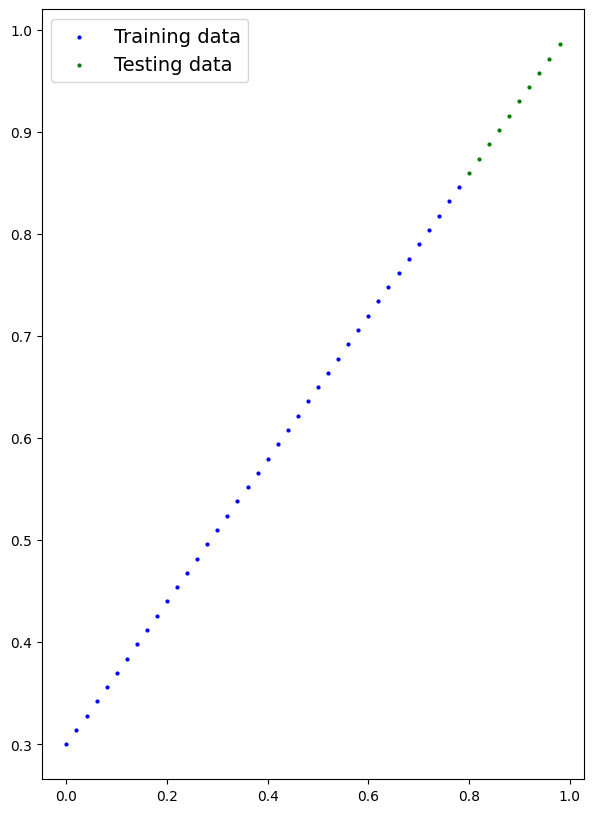

In [ ]:
plot_predictions()

In [ ]:
#Two main algorithms -> 1.Gradient decent 2.Backpropagation
from torch import nn
#2.Build model
#Create linear regression model class
class LinearRegresionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    #Forward method that define the computation in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor:# <- "x" is the input data
    return self.weights*x + self.bias

In [ ]:
#Create a raandom seed
torch.manual_seed(42)

#Create an instance of the model
model_0=LinearRegresionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

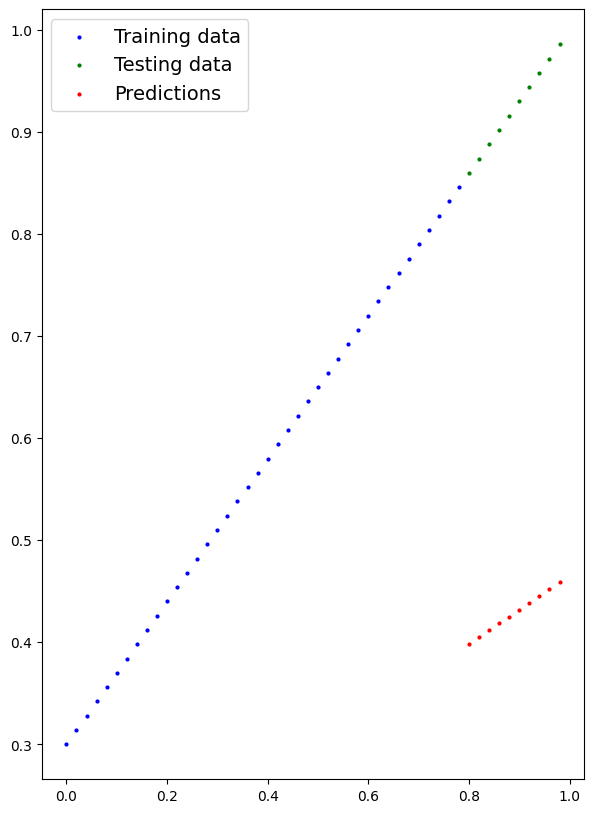

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#Setup loss function
loss_fn=nn.L1Loss()

#Setup an optimiser
optimiser=torch.optim.SGD(params=model_0.parameters(),lr=0.01) #lr=learning rate-> add value to prediction data

In [ ]:
#Building training loop and testing loop
epochs = 100

#Loop through the data
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train()

  #1.Forward pass
  y_pred=model_0(X_test)

  #2.Calculate the loss
  loss=loss_fn(y_pred,y_test)
  #3 Optimiser
  optimiser.zero_grad()
  #4 Perform backpropagation lost
  loss.backward()
  #5 Step the optimiser(perform gradient descend)
  optimiser.step()

  ##Testing
  model_0.eval() #turn off different setting in the model not needed for evaluation
  with torch.inference_mode():#turns off gradient tracking and a couple of things
   #Do the forward pass
   test_pred=model_0(X_test)
   #Calculate the loss
   test_loss=loss_fn(test_pred,y_test)
  if(epoch%10==0):
    print(f"Epoch: {epoch} | Loss:{loss} | Test loss:{test_loss}")
  #print out model state dict
  print(model_0.state_dict())

Epoch: 0 | Loss:0.4945361614227295 | Test loss:0.47661519050598145
OrderedDict([('weights', tensor([0.3456])), ('bias', tensor([0.1388]))])
OrderedDict([('weights', tensor([0.3545])), ('bias', tensor([0.1488]))])
OrderedDict([('weights', tensor([0.3634])), ('bias', tensor([0.1588]))])
OrderedDict([('weights', tensor([0.3723])), ('bias', tensor([0.1688]))])
OrderedDict([('weights', tensor([0.3812])), ('bias', tensor([0.1788]))])
OrderedDict([('weights', tensor([0.3901])), ('bias', tensor([0.1888]))])
OrderedDict([('weights', tensor([0.3990])), ('bias', tensor([0.1988]))])
OrderedDict([('weights', tensor([0.4079])), ('bias', tensor([0.2088]))])
OrderedDict([('weights', tensor([0.4168])), ('bias', tensor([0.2188]))])
OrderedDict([('weights', tensor([0.4257])), ('bias', tensor([0.2288]))])
Epoch: 10 | Loss:0.3153262436389923 | Test loss:0.2974052429199219
OrderedDict([('weights', tensor([0.4346])), ('bias', tensor([0.2388]))])
OrderedDict([('weights', tensor([0.4435])), ('bias', tensor([0.

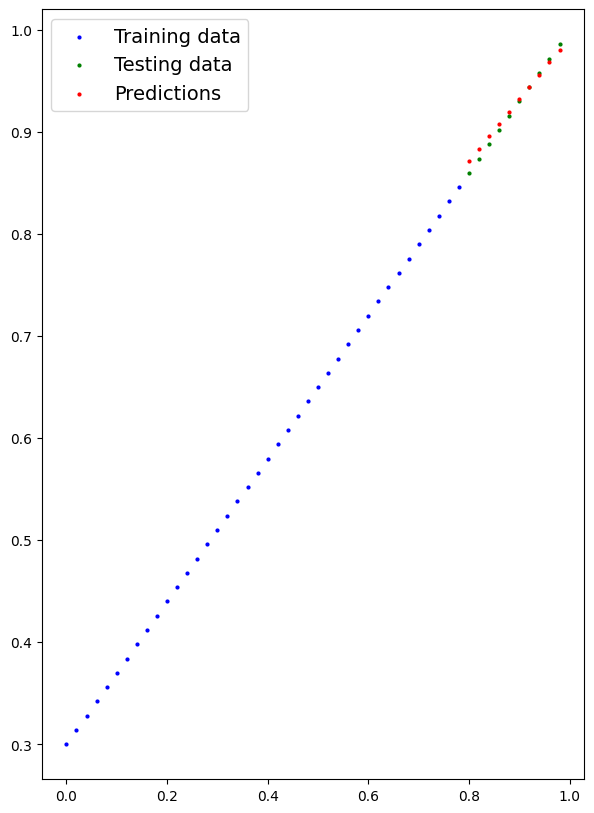

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)
plot_predictions(predictions=y_preds_new)